In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [33]:
from google.colab import files
uploaded = files.upload()

Saving Iris.csv to Iris (1).csv


In [34]:
df=pd.read_csv('Iris.csv',index_col=0)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [35]:
df.shape

(150, 5)

In [36]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [38]:
df.Species.value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

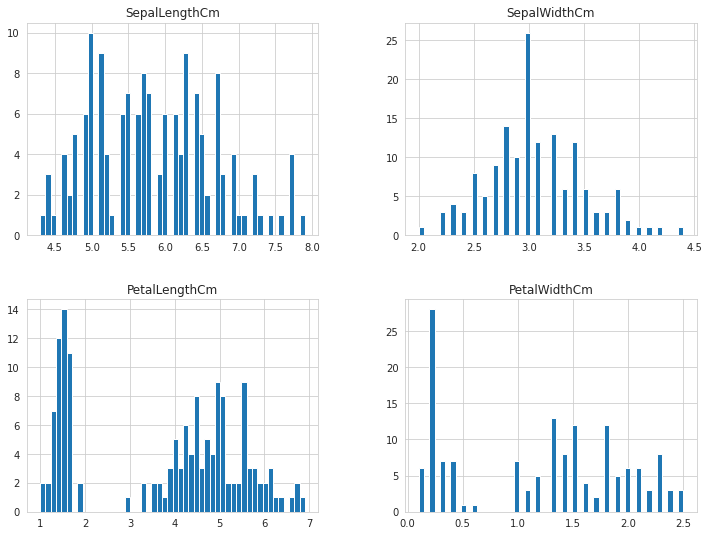

In [39]:
df.hist(bins=50,figsize=(12,9))
plt.show()

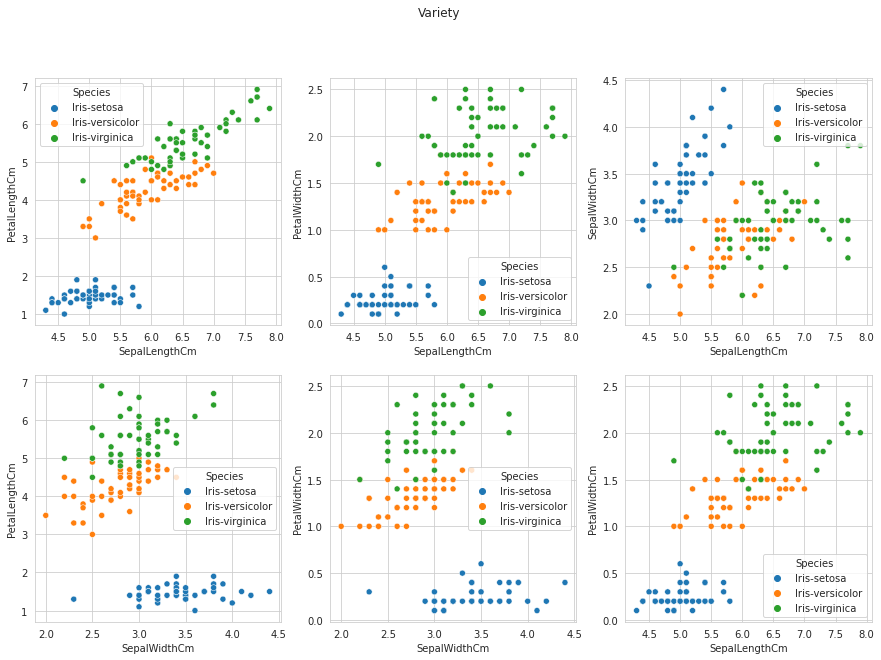

In [44]:
fig,axes=plt.subplots(2,3,figsize=(15,10))
fig.suptitle("Variety")
sns.set_style("whitegrid")
sns.scatterplot(data=df,ax=axes[0,0],hue ="Species",x='SepalLengthCm',y='PetalLengthCm')
sns.scatterplot(data=df,ax=axes[0,1],hue ="Species",x='SepalLengthCm',y='PetalWidthCm')
sns.scatterplot(data=df,ax=axes[0,2],hue ="Species",x='SepalLengthCm',y='SepalWidthCm')
sns.scatterplot(data=df,ax=axes[1,0],hue ="Species",x='SepalWidthCm',y='PetalLengthCm')
sns.scatterplot(data=df,ax=axes[1,1],hue ="Species",x='SepalWidthCm',y='PetalWidthCm')
sns.scatterplot(data=df,ax=axes[1,2],hue ="Species",x='SepalLengthCm',y='PetalWidthCm')

In [70]:
from sklearn.model_selection import train_test_split
X = df.iloc[:, [0,2]].values
y = df.iloc[:, 4].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [71]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(max_depth=3)
clf.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [60]:
from sklearn import metrics
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

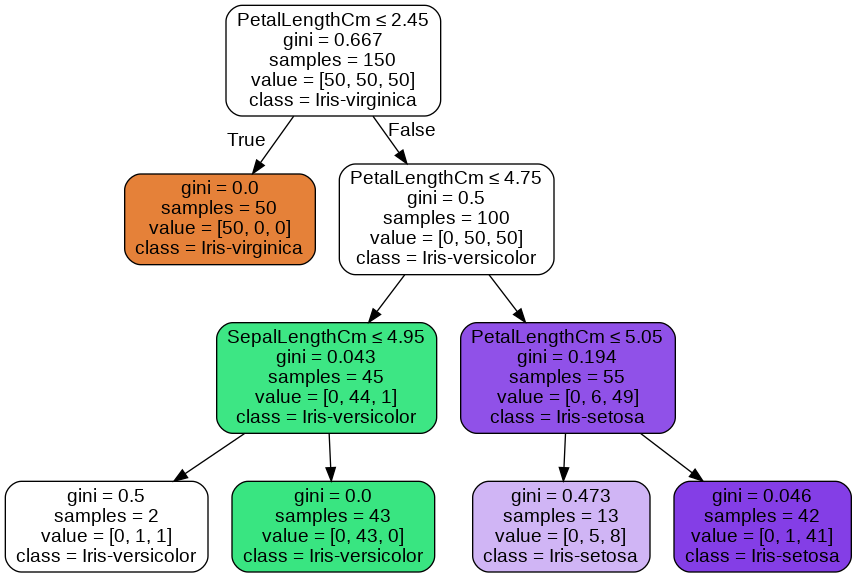

In [72]:
features_col=["SepalLengthCm","PetalLengthCm"]
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = features_col,class_names=['Iris-virginica','Iris-versicolor','Iris-setosa'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Iris.png')
Image(graph.create_png())

In [73]:
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9666666666666667


In [74]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error 
from math import sqrt
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[15  0  0]
 [ 0  7  1]
 [ 0  0  7]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      0.88      0.93         8
 Iris-virginica       0.88      1.00      0.93         7

       accuracy                           0.97        30
      macro avg       0.96      0.96      0.96        30
   weighted avg       0.97      0.97      0.97        30

